In [1]:
from qiskit import *
from qiskit_ibm_provider import IBMProvider

In [2]:
provider = IBMProvider()

In [3]:
provider.backends(simulator=True, operational=True)

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>]

In [4]:
backend = provider.get_backend('ibmq_qasm_simulator')

In [21]:
# Create the first circuit to get classical rails 1 and 2
qr1 = QuantumRegister(4)
cr1 = ClassicalRegister(1, name = 'b')
cr2 = ClassicalRegister(1, name = 'a')
cr_fin = ClassicalRegister(2, name = 'final')
qc = QuantumCircuit(qr1, cr1, cr2, cr_fin)
qc.h(qr1[0])
qc.h(qr1[1])
qc.barrier()
qc.measure(qr1[0],cr1)
qc.measure(qr1[1],cr2)

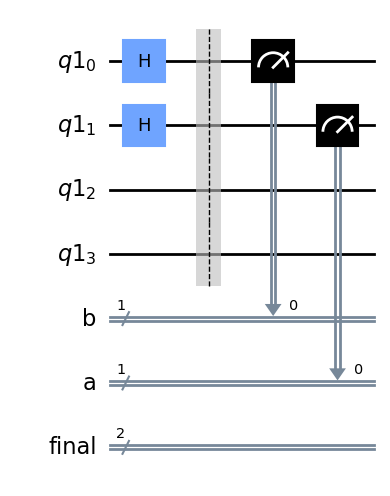

In [22]:
qc.draw('mpl')

In [23]:
qc.barrier()

In [24]:
# Set up second circuit
qc.h(2)
qc.cx(2,3)

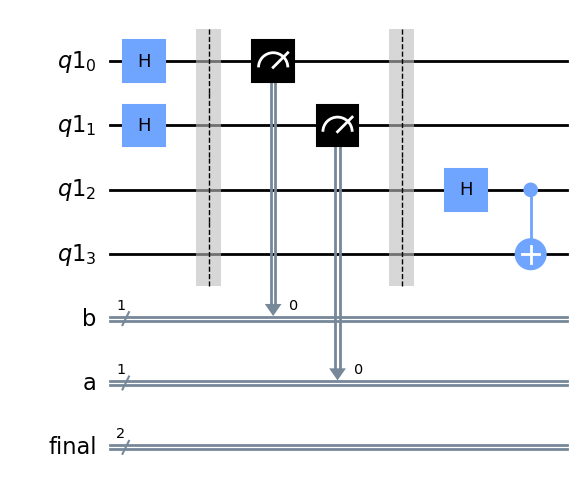

In [25]:
qc.draw('mpl')

In [35]:
cr1

ClassicalRegister(1, 'b')

In [26]:
# If statements
qc.z(2).c_if(cr1,1)
qc.x(2).c_if(cr1,1)
qc.barrier()

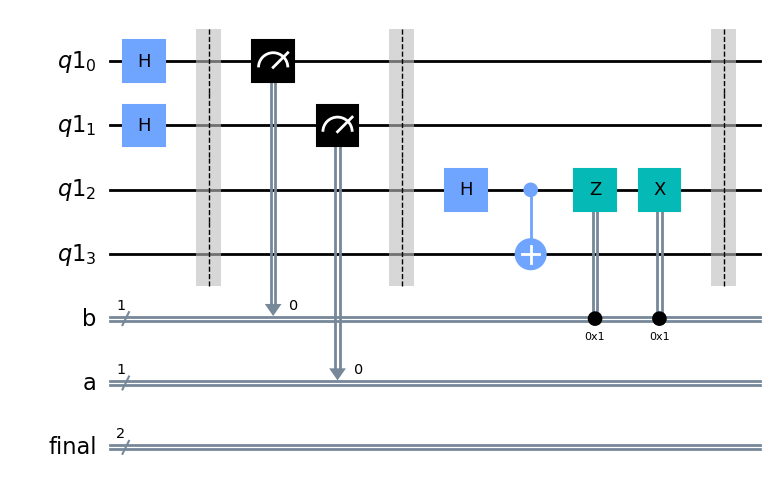

In [27]:
# Measurements
qc.draw('mpl')

In [28]:
qc.cx(2,3)
qc.h(2)
qc.measure(2,cr_fin)
qc.measure(3,cr_fin)
#qc.measure(3)

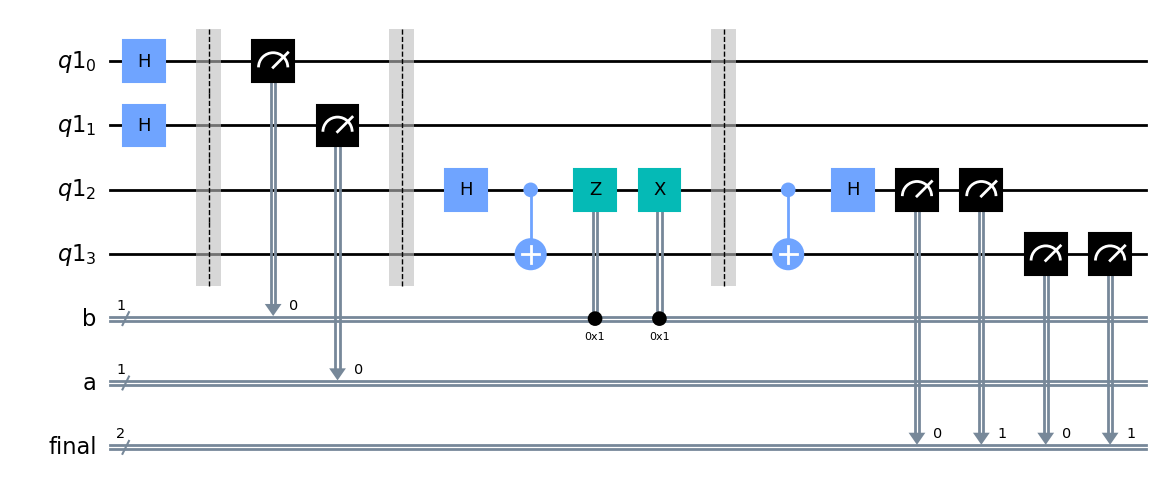

In [29]:
qc.draw('mpl')

In [30]:
job = backend.run(qc, shots = 1000, dynamic = True)

/home/toor/.local/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend.py:443: UserWarning: The backend ibmq_qasm_simulator does not support dynamic circuits.
  warnings.warn(f"The backend {self.name} does not support dynamic circuits.")


In [31]:
results = job.result()
counts = results.get_counts()

In [32]:
counts

{'11 1 1': 260, '00 0 0': 247, '11 0 1': 221, '00 1 0': 272}

In [33]:
from qiskit.visualization import plot_histogram

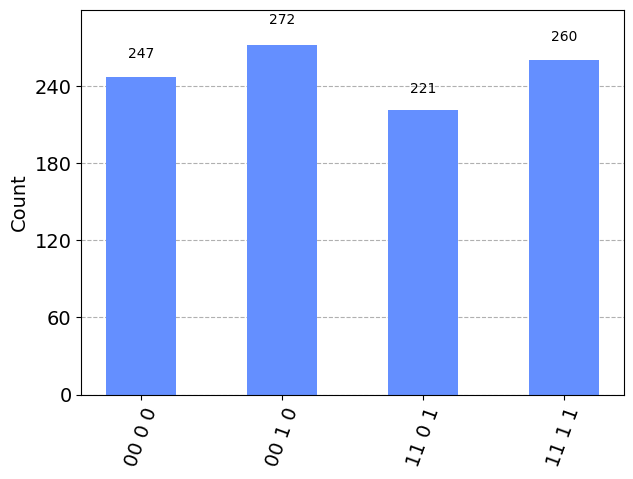

In [34]:
plot_histogram(counts)